#### Knapsack Problem

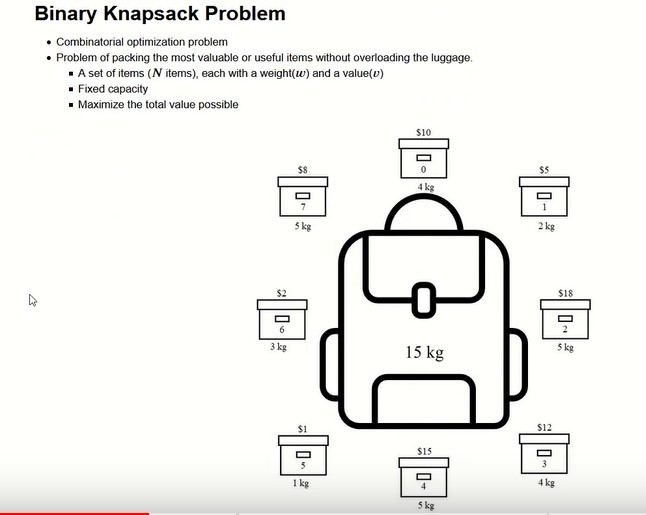

In [107]:
from IPython.display import Image
display(Image(filename='1_LinearProb.jpg'))

Problem Formula

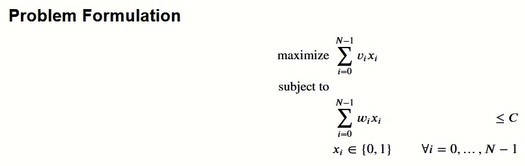

In [108]:
display(Image(filename='1_LinearProb_Formu.jpg'))

In [109]:
from gurobipy import *

Creating the data(weights and values)

In [110]:
w = [10, 2, 1, 4, 5, 5, 3, 5]
v = [20, 5, 18, 12, 15, 1, 2, 8]
C = 15
N = len(w)

In [111]:
knapsack_model = Model('knapsack')

Creating Decision Variable 

In [112]:
x = knapsack_model.addVars(N, vtype=GRB.BINARY, name='x')

Defining objective function

In [113]:
# Sum(i=0)^(N) | w(i)*x(i)

obj_fn = sum(v[i]*x[i] for i in range(N))

Setting model

In [114]:
knapsack_model.setObjective(obj_fn, GRB.MAXIMIZE)

Adding Constraints 

In [115]:
# sum(i=1)^N | w(i)*x(i) <= c

knapsack_model.addConstr(sum(w[i]*x[i] for i in range(N))<= C) 

<gurobi.Constr *Awaiting Model Update*>

Solving model and getting the results

In [116]:
knapsack_model.setParam('OutputFlag', False)
knapsack_model.optimize()
print('Optimization is done. Objective Function Value: %.2f' % knapsack_model.objVal)

# Get values of the decision variables
for ob in knapsack_model.getVars():
    print('%s: %g' % (ob.varName, ob.x))

for i in range(len(w)):
    print('Set: ', i,'| Weight:', w[i], '| Value:', v[i])

Optimization is done. Objective Function Value: 53.00
x[0]: 0
x[1]: 0
x[2]: 1
x[3]: 1
x[4]: 1
x[5]: 0
x[6]: 0
x[7]: 1
Set:  0 | Weight: 10 | Value: 20
Set:  1 | Weight: 2 | Value: 5
Set:  2 | Weight: 1 | Value: 18
Set:  3 | Weight: 4 | Value: 12
Set:  4 | Weight: 5 | Value: 15
Set:  5 | Weight: 5 | Value: 1
Set:  6 | Weight: 3 | Value: 2
Set:  7 | Weight: 5 | Value: 8
